In [ ]:
import keras #pour construire les modele de reseau neurones
from keras.datasets import mnist #pour importer dataset
from keras.models import Sequential #pour preparer lemplacement des couches
from keras.layers import Dense, Dropout #dense=fully connected
from tensorflow.keras.optimizers import RMSprop, Adam #2 fcts utilisé pour la mise a jour des ports
import matplotlib.pyplot as plt #pour dessiner les courbes



taille entree = 28*28


taille sortie = 10 (nbr des classes)

In [ ]:
batch_size = 2048 #nbr des donnes d'entree pourune mise a jour de port
num_classes = 10
epochs = 198


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()  #importer la dataset


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
[5 0 4 1 9 2 1 3 1 4]


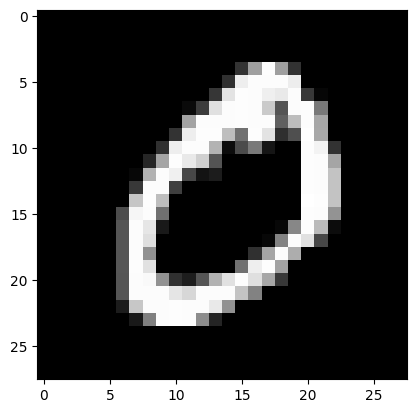

In [ ]:
print(x_train.shape)   #nbr images , ligne , colonnes
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train[:10])

plt.imshow(x_train[1,:,:], cmap="gray")


In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32') # by default, images are stored as unsigned integers from 0 to 255 (you only need 8 bits)
x_test = x_test.astype('float32') # by default, all training is done on "float32"

x_train /= 255.0 #normalisation entre 0 et 1
x_test /= 255.0

print(x_train.shape[0], "train samples") # print the first entry of the size
print(x_test.shape[0], "test samples")

60000 train samples
10000 test samples


In [ ]:
# one-hot encoding: convert class vectors to one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes) #La ligne suivante effectue une conversion des étiquettes de classe y_test en vecteurs binaires à l'aide de la fonction to_categorical du module keras.utils :

#sortie desiré = par machine
#sortie calculer = par expert

print(y_train[1,:])


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
model = Sequential() #reservation
model.add(Dense(100, activation='relu', input_shape=(784,)))  # Input Layer of 784 followed by a hidden layer of 30 neurons. (premiere couche cachée) (relu a une formule)
model.add(Dropout(0.4))  # Adding a dropout layer to prevent overfitting. (desactivation de 40% de neurons de la la premiere couche cachée lors de l'apprentissage )
model.add(Dense(100, activation='relu'))  # Adding more layers.
model.add(Dropout(0.9))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Output layer of 10 neurons for 10 classes.  (la derniere couche) (fonction softmax pour passage probabilité)

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 100)               78500     
                                                                 
 dropout_10 (Dropout)        (None, 100)               0         
                                                                 
 dense_21 (Dense)            (None, 100)               10100     
                                                                 
 dropout_11 (Dropout)        (None, 100)               0         
                                                                 
 dense_22 (Dense)            (None, 100)               10100     
                                                                 
 dense_23 (Dense)            (None, 10)                1010      
                                                                 
Total params: 99,710
Trainable params: 99,710
Non-trai

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])  #optimiser responsable màj du poids


In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))  # Training the model and validating on the test data.

Epoch 1/198
30/30 [==============================] - 3s 75ms/step - loss: 2.2408 - accuracy: 0.1707 - val_loss: 1.8661 - val_accuracy: 0.5631
Epoch 2/198
30/30 [==============================] - 2s 51ms/step - loss: 1.7441 - accuracy: 0.3697 - val_loss: 0.9611 - val_accuracy: 0.7240
Epoch 3/198
30/30 [==============================] - 1s 37ms/step - loss: 1.3398 - accuracy: 0.5045 - val_loss: 0.6846 - val_accuracy: 0.8091
Epoch 4/198
30/30 [==============================] - 1s 39ms/step - loss: 1.1275 - accuracy: 0.5847 - val_loss: 0.5325 - val_accuracy: 0.8797
Epoch 5/198
30/30 [==============================] - 1s 38ms/step - loss: 0.9985 - accuracy: 0.6379 - val_loss: 0.4486 - val_accuracy: 0.8994
Epoch 6/198
30/30 [==============================] - 1s 37ms/step - loss: 0.9131 - accuracy: 0.6725 - val_loss: 0.3841 - val_accuracy: 0.9076
Epoch 7/198
30/30 [==============================] - 1s 37ms/step - loss: 0.8378 - accuracy: 0.7041 - val_loss: 0.3405 - val_accuracy: 0.9158
Epoch 

In [ ]:
score = model.evaluate(x_test, y_test, verbose=1, batch_size=batch_size)  # Evaluating the model on the test data.  (verbose pour l'affichage)   (evaluate pour l'evaluation du model apres l'apprentissage)

print('Test loss:', score[0])
print('Test accuracy:', score[1])


5/5 [==============================] - 0s 12ms/step - loss: 0.2496 - accuracy: 0.9485
Test loss: 0.24963341653347015
Test accuracy: 0.9484999775886536


In [ ]:
import matplotlib.pyplot as plt



In [ ]:
# Plot training accuracy
plt.plot(history.history['accuracy'])
# Plot validation accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()





pour evaluer la performance on doit :
- comparer l'apprentissage et test

*au cours de lapprentissage est ce que le model est en train d'amiliorer ou non (accuraccy temchi w tzid wala bel 3aks)

*overfiting or underfiting or good model or underfiting and overfiting at the same time

*overfitting : si les courbes de valisation (loss or accuracy or both ) de degrade , accuracy tih w loss tzid , ecart mabin apprentissage et test

*les causes de overfitting :
- beaucoup d'epochs (solution: diminuer les epochs)
- un reseau (architecture) complexe et profond par rapport au data (solution: alleger l'architecture : reduire le nbr des neurons de chaque  couche cachée ou augmenter la valeur de dropout)








In [ ]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


1. Initialisation :
   - K = 2 (nombre de clusters)
   - Centres initiaux : c1(x=0, y=1, z=0) et c2(x=1, y=0, z=0)

2. Itération 1 :
   - Calcul des distances :
     - Pour p1 : distance(p1, c1) = sqrt((0-0)^2 + (1-0)^2 + (0-0)^2) = 1
     - Pour p1 : distance(p1, c2) = sqrt((0-1)^2 + (1-0)^2 + (0-0)^2) = sqrt(2)
     - Pour p2 : distance(p2, c1) = sqrt((1-0)^2 + (1-1)^2 + (0-0)^2) = 1
     - Pour p2 : distance(p2, c2) = sqrt((1-1)^2 + (1-0)^2 + (0-0)^2) = 1
     - Pour p3 : distance(p3, c1) = sqrt((0-0)^2 + (-1-1)^2 + (-1-0)^2) = sqrt(5)
     - Pour p3 : distance(p3, c2) = sqrt((0-1)^2 + (-1-0)^2 + (-1-0)^2) = sqrt(3)
     - Pour p4 : distance(p4, c1) = sqrt((1-0)^2 + (1-1)^2 + (1-0)^2) = sqrt(2)
     - Pour p4 : distance(p4, c2) = sqrt((1-1)^2 + (1-0)^2 + (1-0)^2) = 1
     - Pour p5 : distance(p5, c1) = sqrt((-1-0)^2 + (-1-1)^2 + (-1-0)^2) = sqrt(5)
     - Pour p5 : distance(p5, c2) = sqrt((-1-1)^2 + (-1-0)^2 + (-1-0)^2) = sqrt(3)
     - Pour p6 : distance(p6, c1) = sqrt((0-0)^2 + (1-1)^2 + (0-0)^2) = 0
     - Pour p6 : distance(p6, c2) = sqrt((0-1)^2 + (1-0)^2 + (0-0)^2) = sqrt

(2)

   - Assignation des points aux clusters :
     - Cluster 1 : {p1, p2, p4, p6}
     - Cluster 2 : {p3, p5}

   - Calcul des nouveaux centres des clusters :
     - Centre du Cluster 1 : (x=0.5, y=0.75, z=0)
     - Centre du Cluster 2 : (x=0, y=0, z=-0.5)

Poursuivons avec l'itération 2 de l'algorithme :

1. Utilisation des nouveaux centres des clusters de l'itération précédente :
   - Centre du Cluster 1 : (x=0.5, y=0.75, z=0)
   - Centre du Cluster 2 : (x=0, y=0, z=-0.5)

2. Calcul des distances entre chaque point et les nouveaux centres des clusters :
   - Pour p1 : distance(p1, c1) = sqrt((0-0.5)^2 + (1-0.75)^2 + (0-0)^2) = sqrt(0.125)
   - Pour p1 : distance(p1, c2) = sqrt((0-0)^2 + (1-0)^2 + (0+0.5)^2) = sqrt(0.5)
   - Pour p2 : distance(p2, c1) = sqrt((1-0.5)^2 + (1-0.75)^2 + (0-0)^2) = sqrt(0.125)
   - Pour p2 : distance(p2, c2) = sqrt((1-0)^2 + (1-0)^2 + (0+0.5)^2) = sqrt(1.5)
   - Pour p3 : distance(p3, c1) = sqrt((0-0.5)^2 + (-1-0.75)^2 + (-1-0)^2) = sqrt(4.125)
   - Pour p3 : distance(p3, c2) = sqrt((0-0)^2 + (-1-0)^2 + (-1+0.5)^2) = sqrt(1.75)
   - Pour p4 : distance(p4, c1) = sqrt((1-0.5)^2 + (1-0.75)^2 + (1-0)^2) = sqrt(0.125)
   - Pour p4 : distance(p4, c2) = sqrt((1-0)^2 + (1-0)^2 + (1+0.5)^2) = sqrt(3.5)
   - Pour p5 : distance(p5, c1) = sqrt((-1-0.5)^2 + (-1-0.75)^2 + (-1-0)^2) = sqrt(4.125)
   - Pour p5 : distance(p5, c2) = sqrt((-1-0)^2 + (-1-0)^2 + (-1+0.5)^2) = sqrt(1.75)
   - Pour p6 : distance(p6, c1) = sqrt((0-0.5)^2 + (1-0.75)^2 + (0-0)^2) = sqrt(0.125)
   - Pour p6 : distance(p6, c2) = sqrt((0-0)^2 + (1-0)^2 + (0+0.5)^2) = sqrt(0.5)

3. Assignation des points aux clusters en fonction des distances minimales :
   - Cluster 1 : {p1, p2, p4, p6}
   - Cluster 2 : {p3, p5}

4. Calcul des nouveaux centres des clusters en prenant la moyenne des coordonnées des points de chaque cluster :
   - Centre du Cluster 1 : (x=0.5, y=0.75, z=0)
   - Centre du Cluster 2 : (x=0, y=0, z=-0

.5)

À ce stade, les centres des clusters n'ont pas changé significativement par rapport à l'itération précédente. Vous pouvez soit arrêter l'algorithme à ce stade car les centres des clusters ont convergé, soit répéter les étapes 2 à 4 jusqu'à ce que les centres des clusters convergent davantage ou jusqu'à atteindre un certain nombre maximum d'itérations prédéfini.

Pour prédire dans quel groupe la personne p7 (x=1, y=-1, z=0) va appartenir, nous devons utiliser les centres des clusters obtenus après l'achèvement de l'algorithme k-means.

Supposons que les centres des clusters à la fin de l'algorithme soient les suivants :

Centre du Cluster 1 : (x=0.5, y=0.75, z=0)
Centre du Cluster 2 : (x=0, y=0, z=-0.5)
Calculons la distance entre p7 et les centres des clusters :

Pour p7 : distance(p7, c1) = sqrt((1-0.5)^2 + (-1-0.75)^2 + (0-0)^2) = sqrt(2.125)
Pour p7 : distance(p7, c2) = sqrt((1-0)^2 + (-1-0)^2 + (0+0.5)^2) = sqrt(1.75)
La distance entre p7 et le centre du Cluster 2 (sqrt(1.75)) est plus petite que la distance entre p7 et le centre du Cluster 1 (sqrt(2.125)). Par conséquent, p7 sera attribué au Cluster 2.

Donc, selon la prédiction, la personne p7 (x=1, y=-1, z=0) appartiendrait au Cluster 2.


